## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#from prophet import Prophet
#from prophet.plot import plot_plotly
#from  plotly import plotly.offline as py
#py.init_notebook_mode()

## Data Import

In [3]:
df = pd.read_csv('../raw_data/small_data_v3.csv')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

## Exploratory Analysis

In [5]:
df['DateTime'] = pd.DatetimeIndex(df['DateTime'])

In [6]:
df2=df.groupby(by=["Acorn_Group",df.DateTime]).mean()

In [7]:
df2.unstack(level=0)

KWH/hh                                                    \
Acorn_Group               A      B         C       D        E       F       G   
DateTime                                                                        
2011-11-23 11:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.1300   
2011-11-23 11:30:00     NaN    NaN       NaN     NaN      NaN     NaN  0.1620   
2011-11-23 12:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0780   
2011-11-23 12:30:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0590   
2011-11-23 13:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0580   
...                     ...    ...       ...     ...      ...     ...     ...   
2014-02-27 22:00:00  0.7598  0.146  0.477000  0.7144  0.33675  0.2668  0.1706   
2014-02-27 22:30:00  0.5234  0.174  0.406667  0.6074  0.33775  0.3218  0.1404   
2014-02-27 23:00:00  0.4336  0.119  0.414333  0.3862  0.47100  0.2160  0.1528   
2014-02-27 23:30:00  0.4786  0.111  0.424333  0.4122  0.29125  0.1792  0.1338   
2014-02-28 00:00:00  0.2356  0.050  0.378000  0.3458  0.87200  0.1530  0.1096   

                                                                       \
Acorn_Group               H       I       J       K       L         M   
DateTime                                                                
2011-11-23 11:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 11:30:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 12:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 12:30:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 13:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
...                     ...     ...     ...     ...     ...       ...   
2014-02-27 22:00:00  0.2700  0.3524  0.2504  0.1850  0.3166  0.085000   
2014-02-27 22:30:00  0.2310  0.7008  0.2264  0.2244  0.3452  0.106667   
2014-02-27 23:00:00  0.2134  0.5512  0.1234  0.1730  0.2784  0.082667   
2014-02-27 23:30:00  0.1828  0.2878  0.1020  0.1426  0.1648  0.082000   
2014-02-28 00:00:00  0.1568  0.1082  0.0824  0.1600  0.1336  0.070667   

                                                      
Acorn_Group                N       O       P       Q  
DateTime                                              
2011-11-23 11:00:00      NaN     NaN     NaN     NaN  
2011-11-23 11:30:00      NaN     NaN     NaN     NaN  
2011-11-23 12:00:00      NaN     NaN     NaN     NaN  
2011-11-23 12:30:00      NaN     NaN     NaN     NaN  
2011-11-23 13:00:00      NaN     NaN     NaN     NaN  
...                      ...     ...     ...     ...  
2014-02-27 22:00:00  0.36775  0.1414  0.0724  0.1308  
2014-02-27 22:30:00  0.22275  0.1226  0.0692  0.1336  
2014-02-27 23:00:00  0.22525  0.1000  0.0504  0.3306  
2014-02-27 23:30:00  0.18375  0.0958  0.0446  0.2948  
2014-02-28 00:00:00  0.15275  0.1012  0.3232  0.7112  

[39723 rows x 17 columns]

In [8]:
df3=df2.unstack(level=0).dropna()

Text(0, 0.5, 'Energy(kW/HH)')

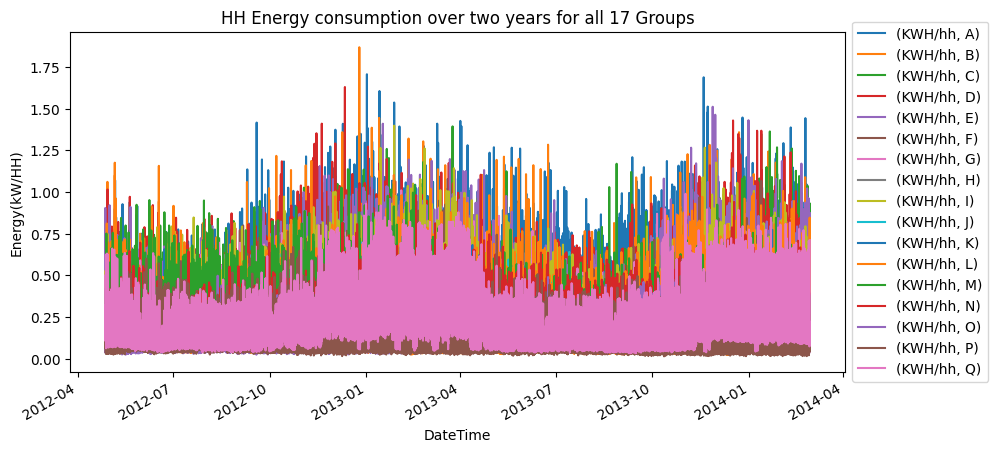

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
df3.plot(ax=ax)

plt.title('HH Energy consumption over two years for all 17 Groups', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Energy(kW/HH)")

#### P Looks very low compared to other groups - will plot this more clearly

In [10]:
dfpq = df3['KWH/hh'][['P', 'Q']]

In [11]:
dfpq

Acorn_Group,P,Q
DateTime,,
2012-04-27 10:00:00,0.0648,0.2768
2012-04-27 10:30:00,0.0926,0.3080
2012-04-27 11:00:00,0.0632,0.1740
2012-04-27 11:30:00,0.0648,0.1202
2012-04-27 12:00:00,0.0884,0.1246
...,...,...
2014-02-27 22:00:00,0.0724,0.1308
2014-02-27 22:30:00,0.0692,0.1336
2014-02-27 23:00:00,0.0504,0.3306


Text(0, 0.5, 'Energy(kW/HH)')

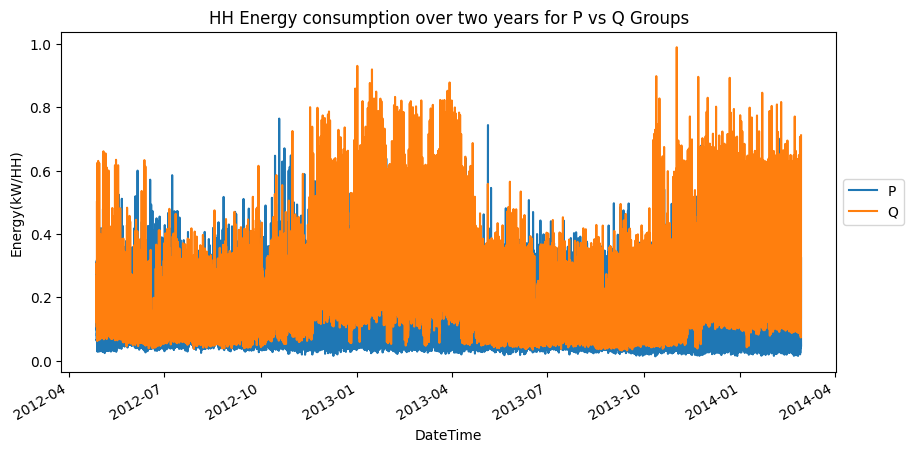

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
dfpq.plot(ax=ax)

plt.title('HH Energy consumption over two years for P vs Q Groups', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Energy(kW/HH)")

### Looking at group averages more clearly

In [13]:
df4=df3.copy()
mean_groups=pd.DataFrame(df4.describe().iloc[1,:].unstack(level=0))
mean_groups=mean_groups.reset_index()
mean_groups

,Acorn_Group,KWH/hh
0,A,0.356285
1,B,0.106311
2,C,0.283437
3,D,0.308251
4,E,0.277526
5,F,0.209428
6,G,0.200679
7,H,0.209501
8,I,0.204373
9,J,0.172194


In [14]:
df4

KWH/hh                                                    \
Acorn_Group               A      B         C       D        E       F       G   
DateTime                                                                        
2012-04-27 10:00:00  0.1940  0.181  0.494600  0.5400  0.31600  0.1726  0.2802   
2012-04-27 10:30:00  0.2048  0.102  0.343000  0.3030  0.90400  0.1776  0.1352   
2012-04-27 11:00:00  0.2572  0.108  0.341000  0.3308  0.67940  0.1710  0.2268   
2012-04-27 11:30:00  0.1882  0.844  0.344000  0.2574  0.65600  0.1486  0.1372   
2012-04-27 12:00:00  0.1478  0.168  0.274000  0.3564  0.23600  0.3180  0.1666   
...                     ...    ...       ...     ...      ...     ...     ...   
2014-02-27 22:00:00  0.7598  0.146  0.477000  0.7144  0.33675  0.2668  0.1706   
2014-02-27 22:30:00  0.5234  0.174  0.406667  0.6074  0.33775  0.3218  0.1404   
2014-02-27 23:00:00  0.4336  0.119  0.414333  0.3862  0.47100  0.2160  0.1528   
2014-02-27 23:30:00  0.4786  0.111  0.424333  0.4122  0.29125  0.1792  0.1338   
2014-02-28 00:00:00  0.2356  0.050  0.378000  0.3458  0.87200  0.1530  0.1096   

                                                                       \
Acorn_Group               H       I       J       K       L         M   
DateTime                                                                
2012-04-27 10:00:00  0.1254  0.1854  0.1588  0.1374  0.1768  0.175000   
2012-04-27 10:30:00  0.1814  0.0904  0.2120  0.1352  0.1084  0.137800   
2012-04-27 11:00:00  0.1626  0.0780  0.1274  0.1312  0.3470  0.158600   
2012-04-27 11:30:00  0.1688  0.1134  0.1190  0.1688  0.3288  0.224800   
2012-04-27 12:00:00  0.1760  0.2232  0.1122  0.1738  0.2708  0.158400   
...                     ...     ...     ...     ...     ...       ...   
2014-02-27 22:00:00  0.2700  0.3524  0.2504  0.1850  0.3166  0.085000   
2014-02-27 22:30:00  0.2310  0.7008  0.2264  0.2244  0.3452  0.106667   
2014-02-27 23:00:00  0.2134  0.5512  0.1234  0.1730  0.2784  0.082667   
2014-02-27 23:30:00  0.1828  0.2878  0.1020  0.1426  0.1648  0.082000   
2014-02-28 00:00:00  0.1568  0.1082  0.0824  0.1600  0.1336  0.070667   

                                                      
Acorn_Group                N       O       P       Q  
DateTime                                              
2012-04-27 10:00:00  0.13220  0.0470  0.0648  0.2768  
2012-04-27 10:30:00  0.09920  0.0372  0.0926  0.3080  
2012-04-27 11:00:00  0.13500  0.1010  0.0632  0.1740  
2012-04-27 11:30:00  0.10640  0.0638  0.0648  0.1202  
2012-04-27 12:00:00  0.06660  0.0508  0.0884  0.1246  
...                      ...     ...     ...     ...  
2014-02-27 22:00:00  0.36775  0.1414  0.0724  0.1308  
2014-02-27 22:30:00  0.22275  0.1226  0.0692  0.1336  
2014-02-27 23:00:00  0.22525  0.1000  0.0504  0.3306  
2014-02-27 23:30:00  0.18375  0.0958  0.0446  0.2948  
2014-02-28 00:00:00  0.15275  0.1012  0.3232  0.7112  

[32161 rows x 17 columns]

<AxesSubplot:xlabel='Acorn_Group', ylabel='KWH/hh'>

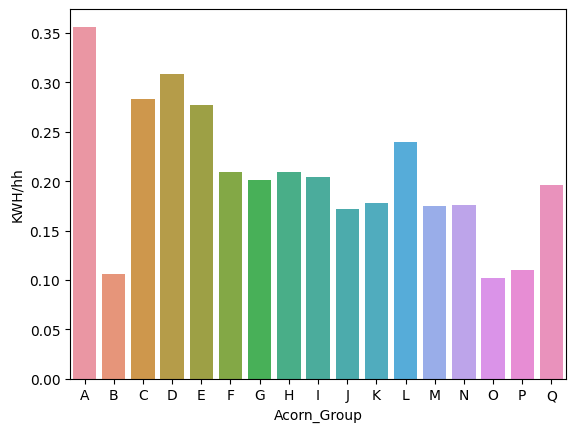

In [15]:
sns.barplot(x=mean_groups['Acorn_Group'],y=mean_groups['KWH/hh'])

In [16]:
df

,LCLid,Acorn_Group,DateTime,KWH/hh
0,MAC000018,E,2011-12-07 09:30:00,0.303
1,MAC000018,E,2011-12-07 10:00:00,0.200
2,MAC000018,E,2011-12-07 10:30:00,0.218
3,MAC000018,E,2011-12-07 11:00:00,0.209
4,MAC000018,E,2011-12-07 11:30:00,0.210
...,...,...,...,...
2969390,MAC000897,B,2014-02-27 22:30:00,0.174
2969391,MAC000897,B,2014-02-27 23:00:00,0.119
2969392,MAC000897,B,2014-02-27 23:30:00,0.111
2969393,MAC000897,B,2014-02-28 00:00:00,0.050


In [17]:
df['month'] = pd.DatetimeIndex(df['DateTime']).month
df.head()

,LCLid,Acorn_Group,DateTime,KWH/hh,month
0,MAC000018,E,2011-12-07 09:30:00,0.303,12
1,MAC000018,E,2011-12-07 10:00:00,0.200,12
2,MAC000018,E,2011-12-07 10:30:00,0.218,12
3,MAC000018,E,2011-12-07 11:00:00,0.209,12
4,MAC000018,E,2011-12-07 11:30:00,0.210,12


In [18]:
df['day'] = pd.DatetimeIndex(df['DateTime']).day
df

,LCLid,Acorn_Group,DateTime,KWH/hh,month,day
0,MAC000018,E,2011-12-07 09:30:00,0.303,12,7
1,MAC000018,E,2011-12-07 10:00:00,0.200,12,7
2,MAC000018,E,2011-12-07 10:30:00,0.218,12,7
3,MAC000018,E,2011-12-07 11:00:00,0.209,12,7
4,MAC000018,E,2011-12-07 11:30:00,0.210,12,7
...,...,...,...,...,...,...
2969390,MAC000897,B,2014-02-27 22:30:00,0.174,2,27
2969391,MAC000897,B,2014-02-27 23:00:00,0.119,2,27
2969392,MAC000897,B,2014-02-27 23:30:00,0.111,2,27
2969393,MAC000897,B,2014-02-28 00:00:00,0.050,2,28


In [19]:
df['day_of_week'] = df['DateTime'].dt.day_name()

In [20]:
dfgrouped=df.groupby(by=[df.day,df.month,'Acorn_Group']).mean()

In [21]:
dfgrouped

KWH/hh
day month Acorn_Group          
1   1     A            0.494485
          B            0.110760
          C            0.380783
          D            0.328249
          E            0.424665
...                         ...
31  12    M            0.239487
          N            0.191631
          O            0.128031
          P            0.130811
          Q            0.267806

[6220 rows x 1 columns]

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfgrouped)

                         KWH/hh
day month Acorn_Group          
1   1     A            0.494485
          B            0.110760
          C            0.380783
          D            0.328249
          E            0.424665
          F            0.226150
          G            0.234406
          H            0.218322
          I            0.177325
          J            0.255312
          K            0.176764
          L            0.297696
          M            0.266163
          N            0.203098
          O            0.142997
          P            0.128099
          Q            0.266558
    2     A            0.398617
          B            0.117844
          C            0.326722
          D            0.349406
          E            0.368406
          F            0.238171
          G            0.224513
          H            0.228285
          I            0.235152
          J            0.190293
          K            0.207081
          L            0.285819
        

In [23]:
monthdf = df.groupby(by=[df.month,'Acorn_Group']).mean()
monthdf

KWH/hh        day
month Acorn_Group                     
1     A            0.397424  16.003851
      B            0.125476  16.005709
      C            0.377110  15.754110
      D            0.353624  16.004119
      E            0.361342  16.003022
...                     ...        ...
12    M            0.232103  17.199399
      N            0.199452  16.721344
      O            0.118378  16.003247
      P            0.110346  16.444883
      Q            0.271019  16.984639

[204 rows x 2 columns]

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(monthdf)

                     KWH/hh        day
month Acorn_Group                     
1     A            0.397424  16.003851
      B            0.125476  16.005709
      C            0.377110  15.754110
      D            0.353624  16.004119
      E            0.361342  16.003022
      F            0.237563  15.990622
      G            0.231568  16.004254
      H            0.228586  16.003627
      I            0.243836  15.996833
      J            0.193275  15.997648
      K            0.206614  16.003627
      L            0.286375  16.002955
      M            0.239418  15.918069
      N            0.196691  16.004433
      O            0.113240  16.005374
      P            0.115267  16.004814
      Q            0.269930  16.007662
2     A            0.382177  14.520317
      B            0.117979  14.267499
      C            0.358521  14.157364
      D            0.354652  14.520791
      E            0.368916  14.554025
      F            0.238020  14.519927
      G            0.2169

In [25]:
monthdf2 =monthdf.reset_index()

In [26]:
monthdf2

,month,Acorn_Group,KWH/hh,day
0,1,A,0.397424,16.003851
1,1,B,0.125476,16.005709
2,1,C,0.377110,15.754110
3,1,D,0.353624,16.004119
4,1,E,0.361342,16.003022
...,...,...,...,...
199,12,M,0.232103,17.199399
200,12,N,0.199452,16.721344
201,12,O,0.118378,16.003247
202,12,P,0.110346,16.444883


In [27]:
winter = monthdf2[monthdf2.month < 3]

In [28]:
winter

,month,Acorn_Group,KWH/hh,day
0,1,A,0.397424,16.003851
1,1,B,0.125476,16.005709
2,1,C,0.377110,15.754110
3,1,D,0.353624,16.004119
4,1,E,0.361342,16.003022
5,1,F,0.237563,15.990622
6,1,G,0.231568,16.004254
7,1,H,0.228586,16.003627
8,1,I,0.243836,15.996833
9,1,J,0.193275,15.997648


In [29]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13,10)})


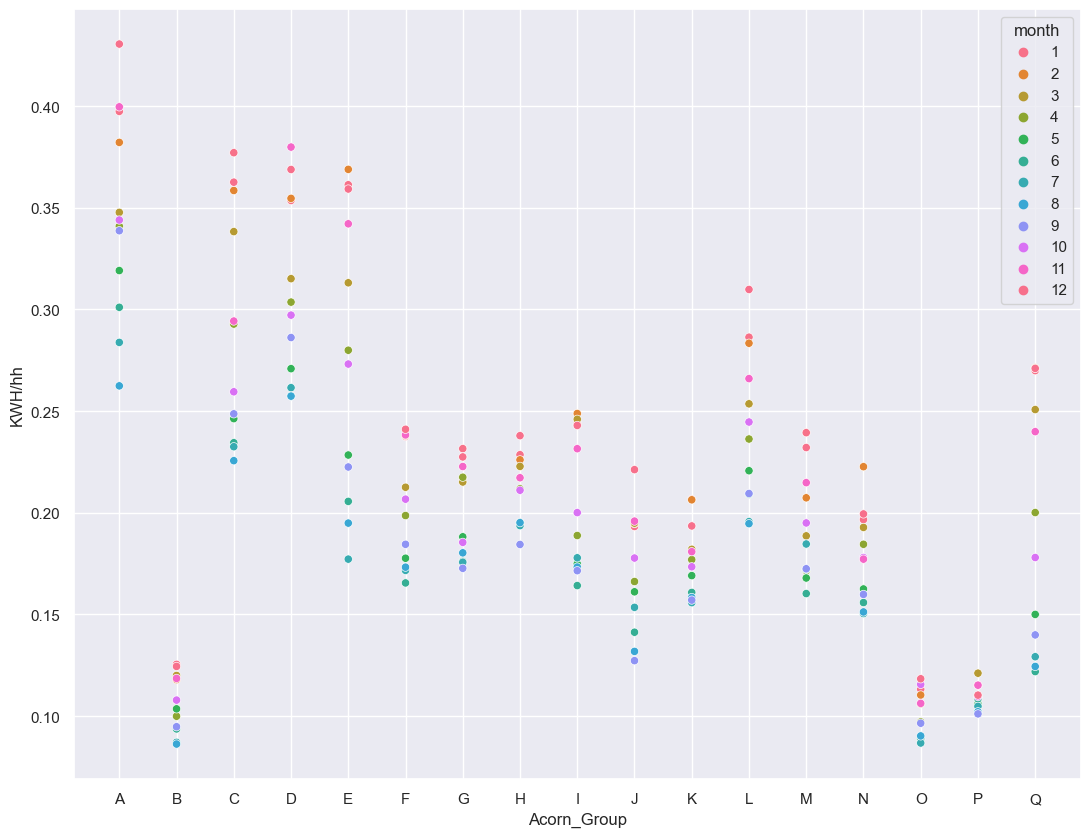

In [30]:
ax = sns.scatterplot(x="Acorn_Group", y="KWH/hh", hue= 'month',legend="full", palette = "husl", data=monthdf2)


In [31]:
dfgrouped2 = df[['day_of_week','Acorn_Group', 'KWH/hh']]

In [32]:
dfdayweek = dfgrouped2.groupby(by=['day_of_week','Acorn_Group']).mean()

In [33]:
dfdayweek2 =dfdayweek.reset_index()

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dfdayweek2)

    day_of_week Acorn_Group    KWH/hh
0        Friday           A  0.317935
1        Friday           B  0.112148
2        Friday           C  0.307392
3        Friday           D  0.288863
4        Friday           E  0.276653
5        Friday           F  0.212383
6        Friday           G  0.200720
7        Friday           H  0.210145
8        Friday           I  0.199862
9        Friday           J  0.167811
10       Friday           K  0.184740
11       Friday           L  0.239648
12       Friday           M  0.193298
13       Friday           N  0.174212
14       Friday           O  0.096607
15       Friday           P  0.109270
16       Friday           Q  0.207868
17       Monday           A  0.354713
18       Monday           B  0.085572
19       Monday           C  0.292745
20       Monday           D  0.321343
21       Monday           E  0.292195
22       Monday           F  0.202924
23       Monday           G  0.199095
24       Monday           H  0.211714
25       Mon

In [35]:
dfdayweek3 = dfdayweek2.reset_index()

In [36]:
dfdayweek2

,day_of_week,Acorn_Group,KWH/hh
0,Friday,A,0.317935
1,Friday,B,0.112148
2,Friday,C,0.307392
3,Friday,D,0.288863
4,Friday,E,0.276653
...,...,...,...
114,Wednesday,M,0.188764
115,Wednesday,N,0.170412
116,Wednesday,O,0.099774
117,Wednesday,P,0.110597


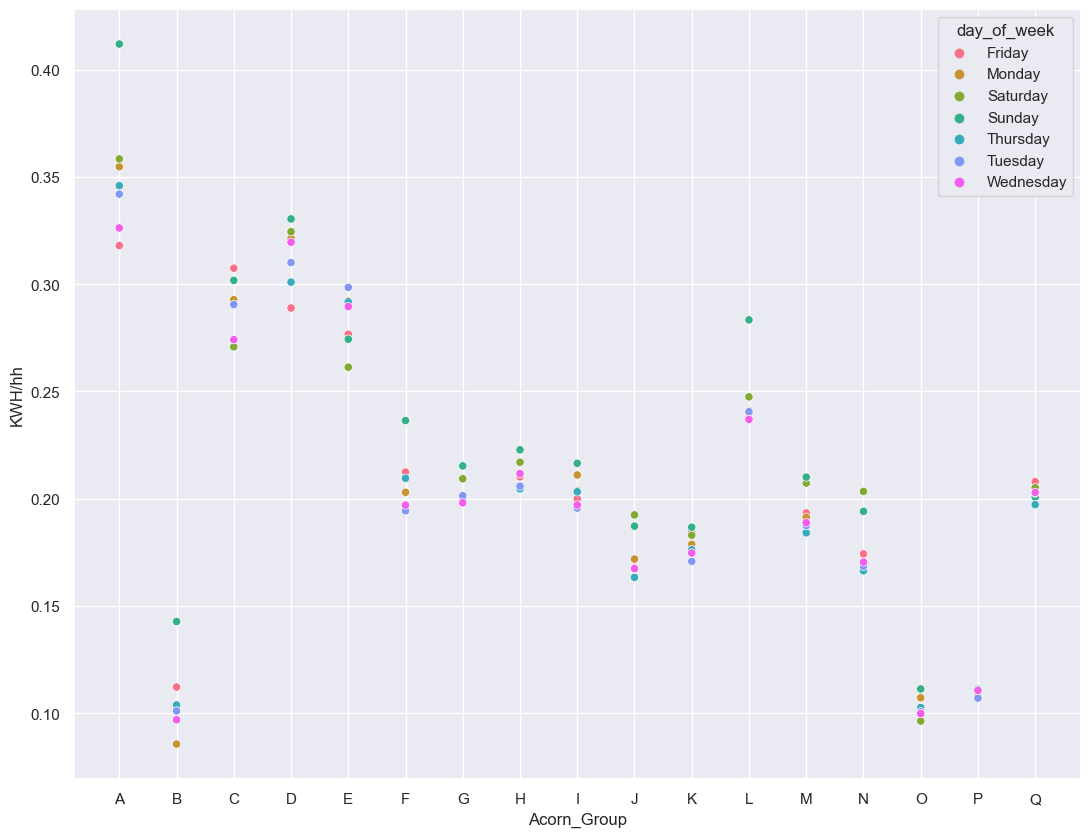

In [37]:
ax = sns.scatterplot(x="Acorn_Group", y="KWH/hh", hue= 'day_of_week',legend="full", palette = "husl", data=dfdayweek2)

## Looking outliers on the individual house level

In [98]:
dfhouse =df.groupby(by=["LCLid", "Acorn_Group"]).mean().reset_index()

In [99]:
dfhouse

,LCLid,Acorn_Group,KWH/hh,month,day
0,MAC000018,E,0.223854,6.325145,15.799903
1,MAC000019,K,0.129559,6.323547,15.802380
2,MAC000020,J,0.136753,6.325375,15.799555
3,MAC000021,E,0.468887,6.324838,15.799785
4,MAC000022,Q,0.261475,6.325510,15.801003
...,...,...,...,...,...
76,MAC000726,I,0.214645,6.763370,15.860053
77,MAC000824,I,0.200862,6.798660,15.796738
78,MAC000833,I,0.259483,6.793021,15.791841
79,MAC000854,I,0.147173,6.792243,15.793111


In [105]:
CA = ('A','B','C','D','E','F','G','H','I','J','K','L','M','O','P','Q')

In [111]:
# x and y given as DataFrame columns
import plotly.express as px
# iris is a pandas DataFrame
fig = px.scatter(dfhouse, x="Acorn_Group", y="KWH/hh", hover_data= ['LCLid'], color='LCLid',category_orders={"Acorn_Group": ['A','B','C','D','E','F','G','H','I','J','K','L','M', 'N','O','P','Q']})
fig.show()
